### Importing dependencies

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df = pd.read_csv('../datasets/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

## Exploratory Data Analysis

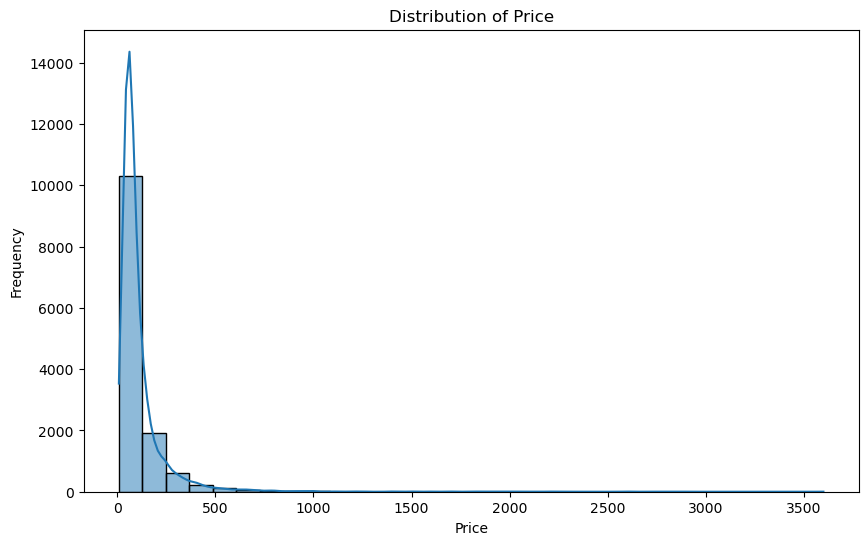

In [5]:
# Visualize the distribution of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [6]:
# # Visualize the correlation matrix
# correlation_matrix = df.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Matrix')
# plt.show()

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


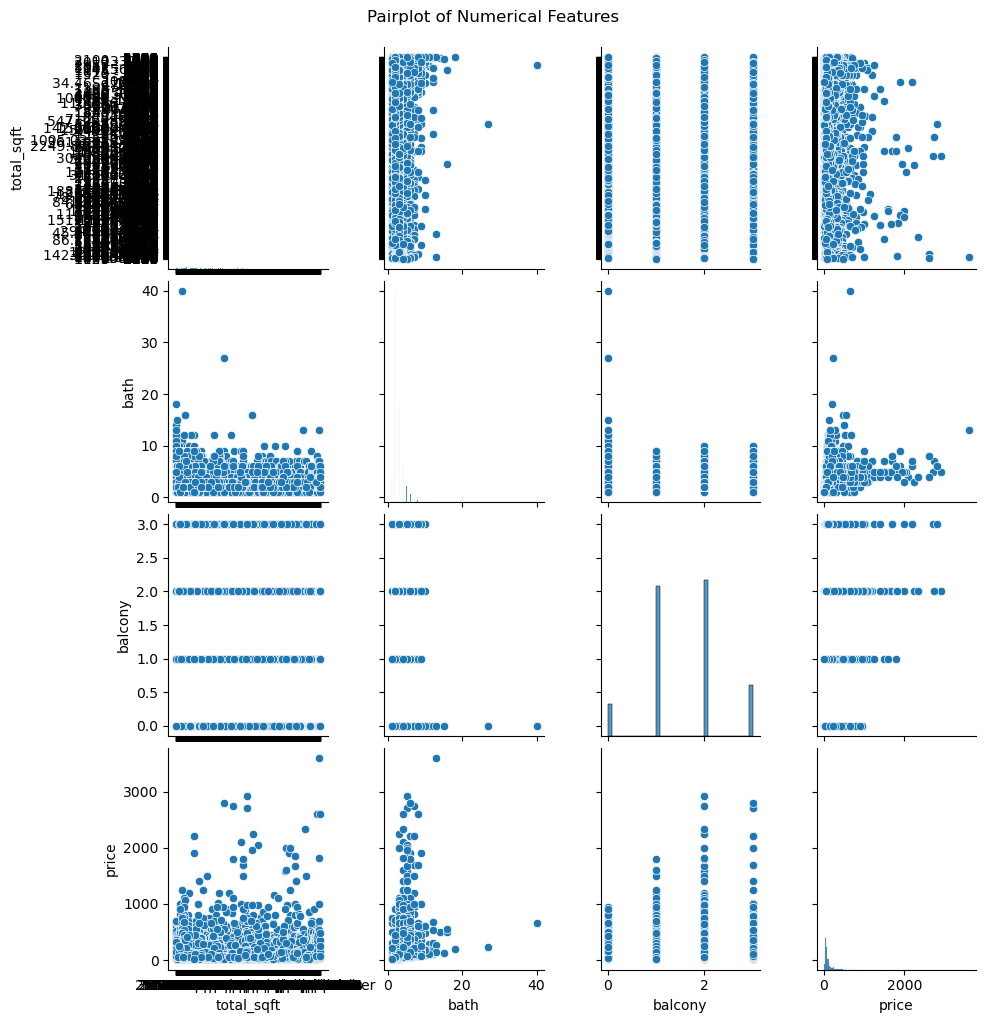

In [7]:
# Visualize the relationship between numerical features and the target variable
sns.pairplot(df, vars=['total_sqft', 'bath', 'balcony', 'price'])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

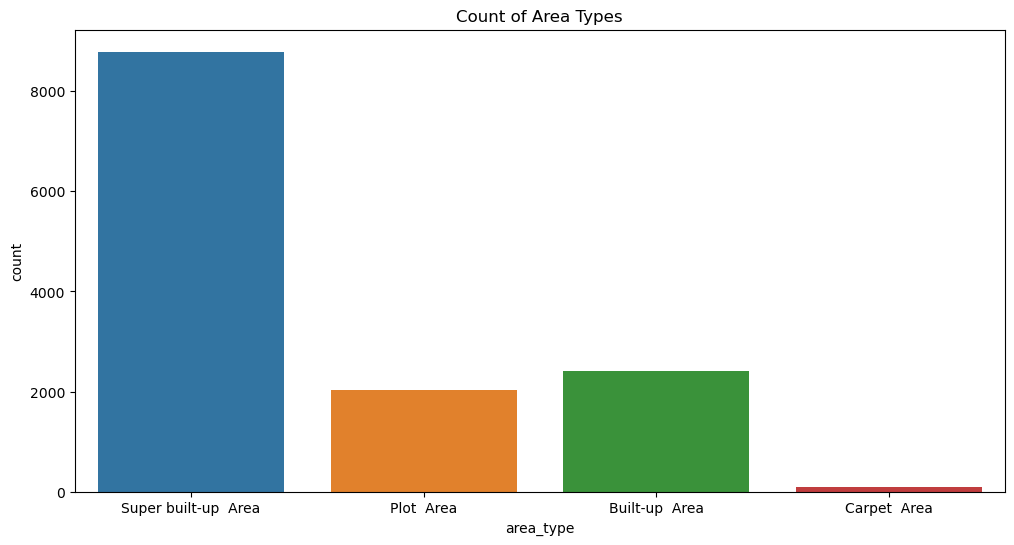

In [8]:
# Visualize the count of categorical features (area_type, availability)
plt.figure(figsize=(12, 6))
sns.countplot(x='area_type', data=df)
plt.title('Count of Area Types')
plt.show()

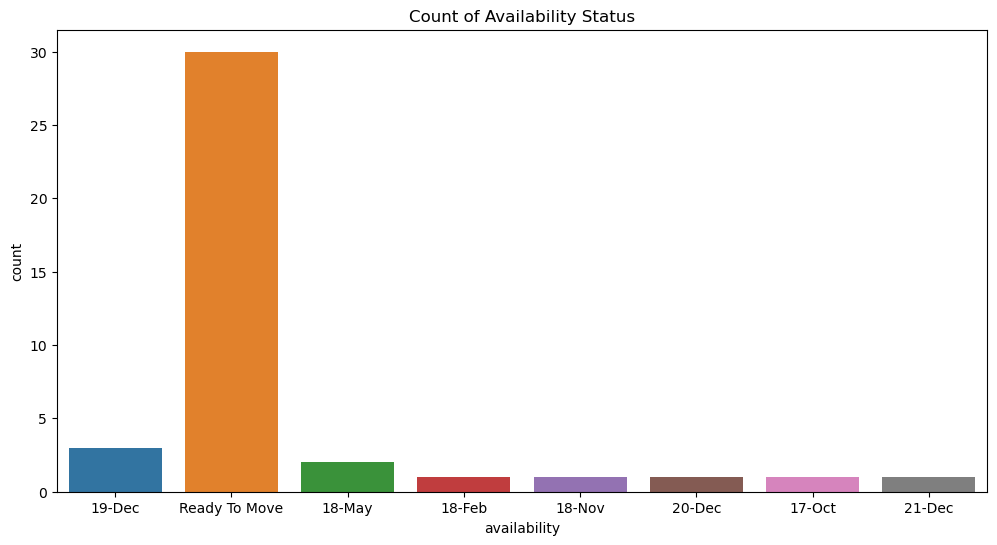

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x='availability', data=df[:40])
plt.title('Count of Availability Status')
plt.show()

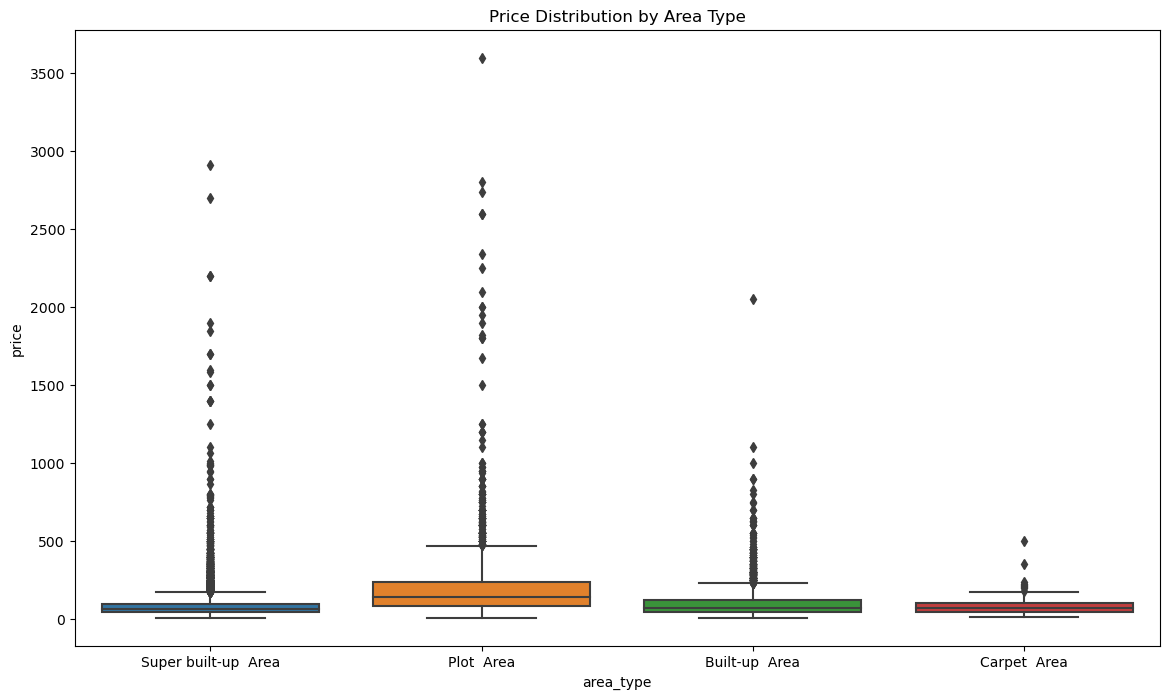

In [10]:
# Visualize the relationship between categorical features and the target variable
plt.figure(figsize=(14, 8))
sns.boxplot(x='area_type', y='price', data=df)
plt.title('Price Distribution by Area Type')
plt.show()

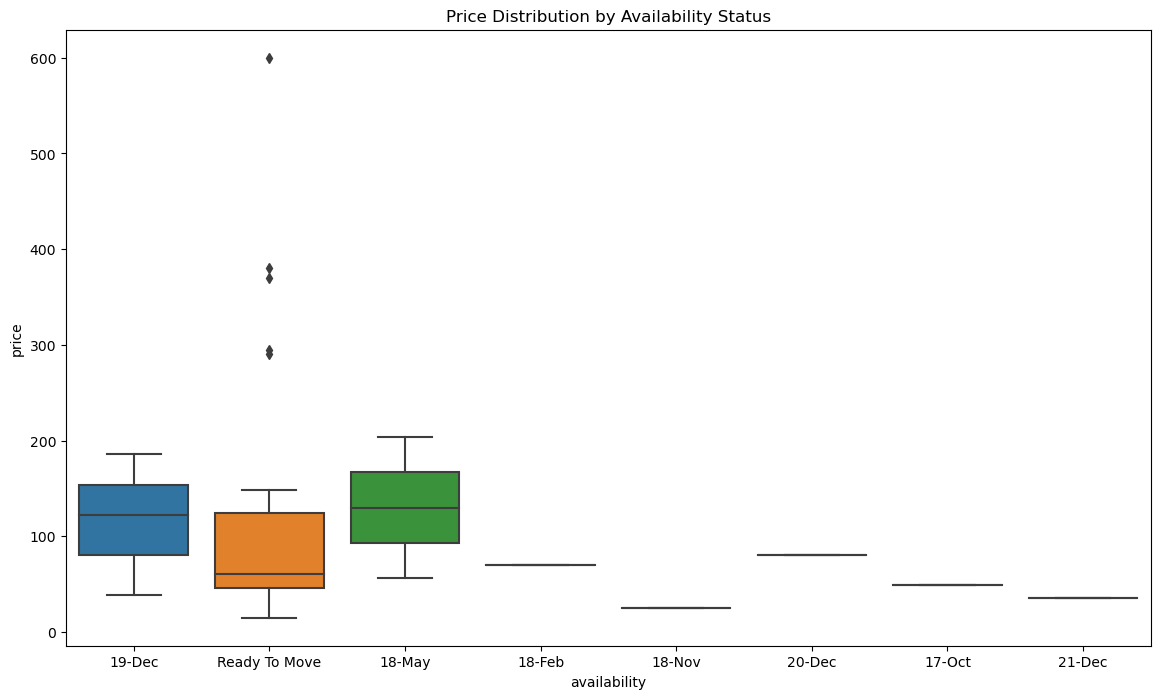

In [11]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='availability', y='price', data=df[:40])
plt.title('Price Distribution by Availability Status')
plt.show()

## Feature engineering

In [12]:
# Extract the number of bedrooms from the 'size' column
df['bedrooms'] = df['size'].apply(lambda x: int(x.split(' ')[0]) if x is not np.nan else np.nan)

In [13]:
# Extract the total area from the 'total_sqft' column (assuming numeric values)
df['total_sqft_numeric'] = pd.to_numeric(df['total_sqft'], errors='coerce')

In [14]:
# Fill missing values in 'total_sqft_numeric' using the mean
df['total_sqft_numeric'].fillna(df['total_sqft_numeric'].mean(), inplace=True)

In [15]:
# Impute missing values in 'bath' and 'balcony' using median values
imputer = SimpleImputer(strategy='median')
df[['bath', 'balcony']] = imputer.fit_transform(df[['bath', 'balcony']])

In [16]:
# Label encode the 'area_type' column
le = LabelEncoder()
df['area_type_encoded'] = le.fit_transform(df['area_type'])
df['location_encoded'] = le.fit_transform(df['location'])

In [17]:
# One-hot encode the 'availability' column
df = pd.get_dummies(df, columns=['availability'], drop_first=True,dtype='int')

In [18]:
# Drop unnecessary columns
columns_to_drop = ['size', 'total_sqft', 'society','area_type','location']
df = df.drop(columns=columns_to_drop)

In [19]:
df.head()

,bath,balcony,price,bedrooms,total_sqft_numeric,area_type_encoded,location_encoded,availability_14-Nov,availability_15-Aug,availability_15-Dec,...,availability_21-Oct,availability_21-Sep,availability_22-Dec,availability_22-Jan,availability_22-Jun,availability_22-Mar,availability_22-May,availability_22-Nov,availability_Immediate Possession,availability_Ready To Move
0,2.0,1.0,39.07,2.0,1056.0,3,419,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,3.0,120.00,4.0,2600.0,2,317,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2.0,3.0,62.00,3.0,1440.0,0,1179,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3.0,1.0,95.00,3.0,1521.0,3,757,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2.0,1.0,51.00,2.0,1200.0,3,716,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 87 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   bath                               13320 non-null  float64
 1   balcony                            13320 non-null  float64
 2   price                              13320 non-null  float64
 3   bedrooms                           13304 non-null  float64
 4   total_sqft_numeric                 13320 non-null  float64
 5   area_type_encoded                  13320 non-null  int64  
 6   location_encoded                   13320 non-null  int64  
 7   availability_14-Nov                13320 non-null  int64  
 8   availability_15-Aug                13320 non-null  int64  
 9   availability_15-Dec                13320 non-null  int64  
 10  availability_15-Jun                13320 non-null  int64  
 11  availability_15-Nov                13320 non-null  int

In [27]:
df.isnull().sum()

bath                                  0
balcony                               0
price                                 0
bedrooms                             16
total_sqft_numeric                    0
                                     ..
availability_22-Mar                   0
availability_22-May                   0
availability_22-Nov                   0
availability_Immediate Possession     0
availability_Ready To Move            0
Length: 87, dtype: int64

In [30]:
df['bedrooms'].fillna(df['bedrooms'].median(),inplace=True)

In [31]:
df.isnull().sum()

bath                                 0
balcony                              0
price                                0
bedrooms                             0
total_sqft_numeric                   0
                                    ..
availability_22-Mar                  0
availability_22-May                  0
availability_22-Nov                  0
availability_Immediate Possession    0
availability_Ready To Move           0
Length: 87, dtype: int64

In [32]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns=['price'])
y = df['price']

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train_scaled,y_train)

SVR(kernel='linear')

In [45]:
y_pred = svm_regressor.predict(X_test_scaled)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test,y_pred)
print(f"Mean Squared Error: {mse}")
print(f"r2 score : {r2_score_val*100}")

Mean Squared Error: 10531.044977873978
r2 score : 50.53650159534071
